In [6]:
import pandas as pd
import seaborn as sns

#Render Matplotlib Plots Inline
%matplotlib inline

#Import the standard Python Scientific Libraries
from scipy import stats
import matplotlib.pyplot as plt

#Import Plotly and use it in the Offline Mode
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
#plotly.tools.set_config_file(world_readable=True, sharing='public')

#Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [7]:
mcq=pd.read_csv('C:/Users/lakshay/Desktop/data science/data_ss/multipleChoiceResponses.csv' ,encoding='ISO-8859-1',low_memory=False)

In [8]:
type(mcq)

pandas.core.frame.DataFrame

In [9]:
mcq.head(10)

GenderSelect        Country   Age  \
0  Non-binary, genderqueer, or gender non-conforming            NaN   NaN   
1                                             Female  United States  30.0   
2                                               Male         Canada  28.0   
3                                               Male  United States  56.0   
4                                               Male         Taiwan  38.0   
5                                               Male         Brazil  46.0   
6                                               Male  United States  35.0   
7                                             Female          India  22.0   
8                                             Female      Australia  43.0   
9                                               Male         Russia  33.0   

                                    EmploymentStatus StudentStatus  \
0                                 Employed full-time           NaN   
1                 Not employed, but looking for work           NaN   
2                 Not employed, but looking for work           NaN   
3  Independent contractor, freelancer, or self-em...           NaN   
4                                 Employed full-time           NaN   
5                                 Employed full-time           NaN   
6                                 Employed full-time           NaN   
7                                 Employed full-time           NaN   
8                                 Employed full-time           NaN   
9                                 Employed full-time           NaN   

  LearningDataScience CodeWriter CareerSwitcher  \
0                 NaN        Yes            NaN   
1                 NaN        NaN            NaN   
2                 NaN        NaN            NaN   
3                 NaN        Yes            NaN   
4                 NaN        Yes            NaN   
5                 NaN        Yes            NaN   
6                 NaN        Yes            NaN   
7                 NaN         No            Yes   
8                 NaN        Yes            NaN   
9                 NaN        Yes            NaN   

                  CurrentJobTitleSelect TitleFit  \
0                 DBA/Database Engineer     Fine   
1                                   NaN      NaN   
2                                   NaN      NaN   
3      Operations Research Practitioner   Poorly   
4                    Computer Scientist     Fine   
5                        Data Scientist     Fine   
6                    Computer Scientist     Fine   
7  Software Developer/Software Engineer     Fine   
8                      Business Analyst     Fine   
9  Software Developer/Software Engineer     Fine   

               ...               JobFactorExperienceLevel JobFactorDepartment  \
0              ...                                    NaN                 NaN   
1              ...                                    NaN                 NaN   
2              ...                         Very Important      Very Important   
3              ...                                    NaN                 NaN   
4              ...                                    NaN                 NaN   
5              ...                                    NaN                 NaN   
6              ...                                    NaN                 NaN   
7              ...                         Very Important  Somewhat important   
8              ...                                    NaN                 NaN   
9              ...                                    NaN                 NaN   

   JobFactorTitle JobFactorCompanyFunding     JobFactorImpact JobFactorRemote  \
0             NaN                     NaN                 NaN             NaN   
1             NaN                     NaN                 NaN             NaN   
2  Very Important          Very Important      Very Important  Very Important   
3             NaN                     NaN                 NaN         

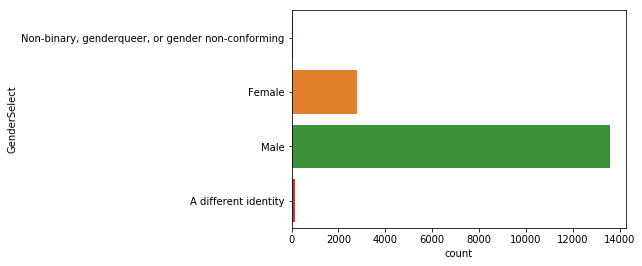

In [95]:
sns.setstyle='whitegrid'
sns.countplot(y='GenderSelect',data=mcq)

In [96]:
con_df=pd.DataFrame(mcq['Country'].value_counts())
con_df['country']=con_df.index
con_df.columns=['num_resp','country']
con_df=con_df.reset_index().drop('index',axis=1)
con_df.head(20)


num_resp                      country
0       4197                United States
1       2704                        India
2       1023                        Other
3        578                       Russia
4        535               United Kingdom
5        471  People 's Republic of China
6        465                       Brazil
7        460                      Germany
8        442                       France
9        440                       Canada
10       421                    Australia
11       320                        Spain
12       277                        Japan
13       254                       Taiwan
14       238                        Italy
15       205                  Netherlands
16       196                      Ukraine
17       194                  South Korea
18       184                    Singapore
19       184                       Poland

In [97]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [98]:
mcq = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_resp'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(56, 142, 60)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Survey Respondents'),
      ) ]

layout = dict(
    title = 'Survey Respondents by Nationality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=mcq, layout=layout )
py.iplot( fig, validate=False, filename='survey-world-map')



In [16]:
#fig=fig_fact.create_distplot([mcq[mcq['Age']>0]['Age']],['age'],colors=['#BAG8CB'])
#py.iplot(fig,filename='Basic Distplot')
fig= fig_fact.create_distplot([mcq[mcq['Age']>0]['Age']],['age'],
                              colors=['#BA68C8'])
py.iplot(fig, filename='Basic Distplot')
savefig('distplot.png')

NameError: name 'savefig' is not defined

In [104]:
#fig= fig_fact.create_distplot([mcq[mcq['Age']>0]['Age']],['age'],
 #                             colors=['#2b2b2b'])
#py.iplot(fig, filename='Basic Distplot')

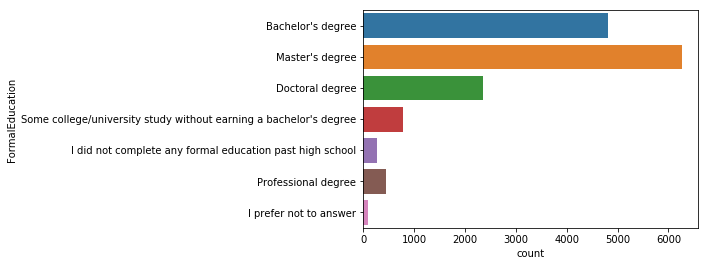

In [106]:
#sns.countplot(y='FormalEducation',data=mcq)

In [13]:
#sns.countplot(y='MajorSelect',data=mcq)

In [31]:
#sns.countplot(y='EmploymentStatus',data=mcq)

In [32]:
#sns.countplot(y='Tenure',data=mcq)

In [14]:
#coding language select- which language is used the most
sns.countplot=(y='LanguageRecommendationSelect',data=mcq)

SyntaxError: invalid syntax (<ipython-input-14-facf5d0ed53a>, line 2)

In [6]:
top_lang = mcq['LanguageRecommendationSelect'].value_counts()
top_lang_dist = []
for lang in top_lang.index:
    top_lang_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['LanguageRecommendationSelect'] == lang)]['Age'])

group_labels = top_lang.index

fig = fig_fact.create_distplot(top_lang_dist, group_labels, show_hist=False)
py.iplot(fig, filename='Language Preferences by Age')


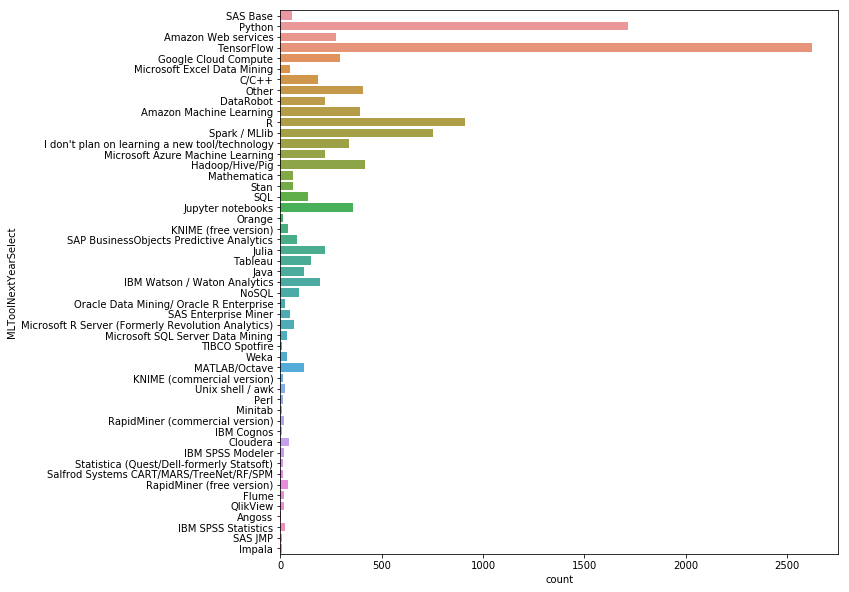

In [8]:
#which platform used most
#render a bar plot of the 15 most popular ML tools for next year
plt.figure(figsize=(10,10)) #to increase the size of image
sns.countplot(y='MLToolNextYearSelect',data=mcq)
#sns.countplot(y='MLToolNextYearSelect',value_counts().head(15)
#sns.barplot(y=data.index,x=data)

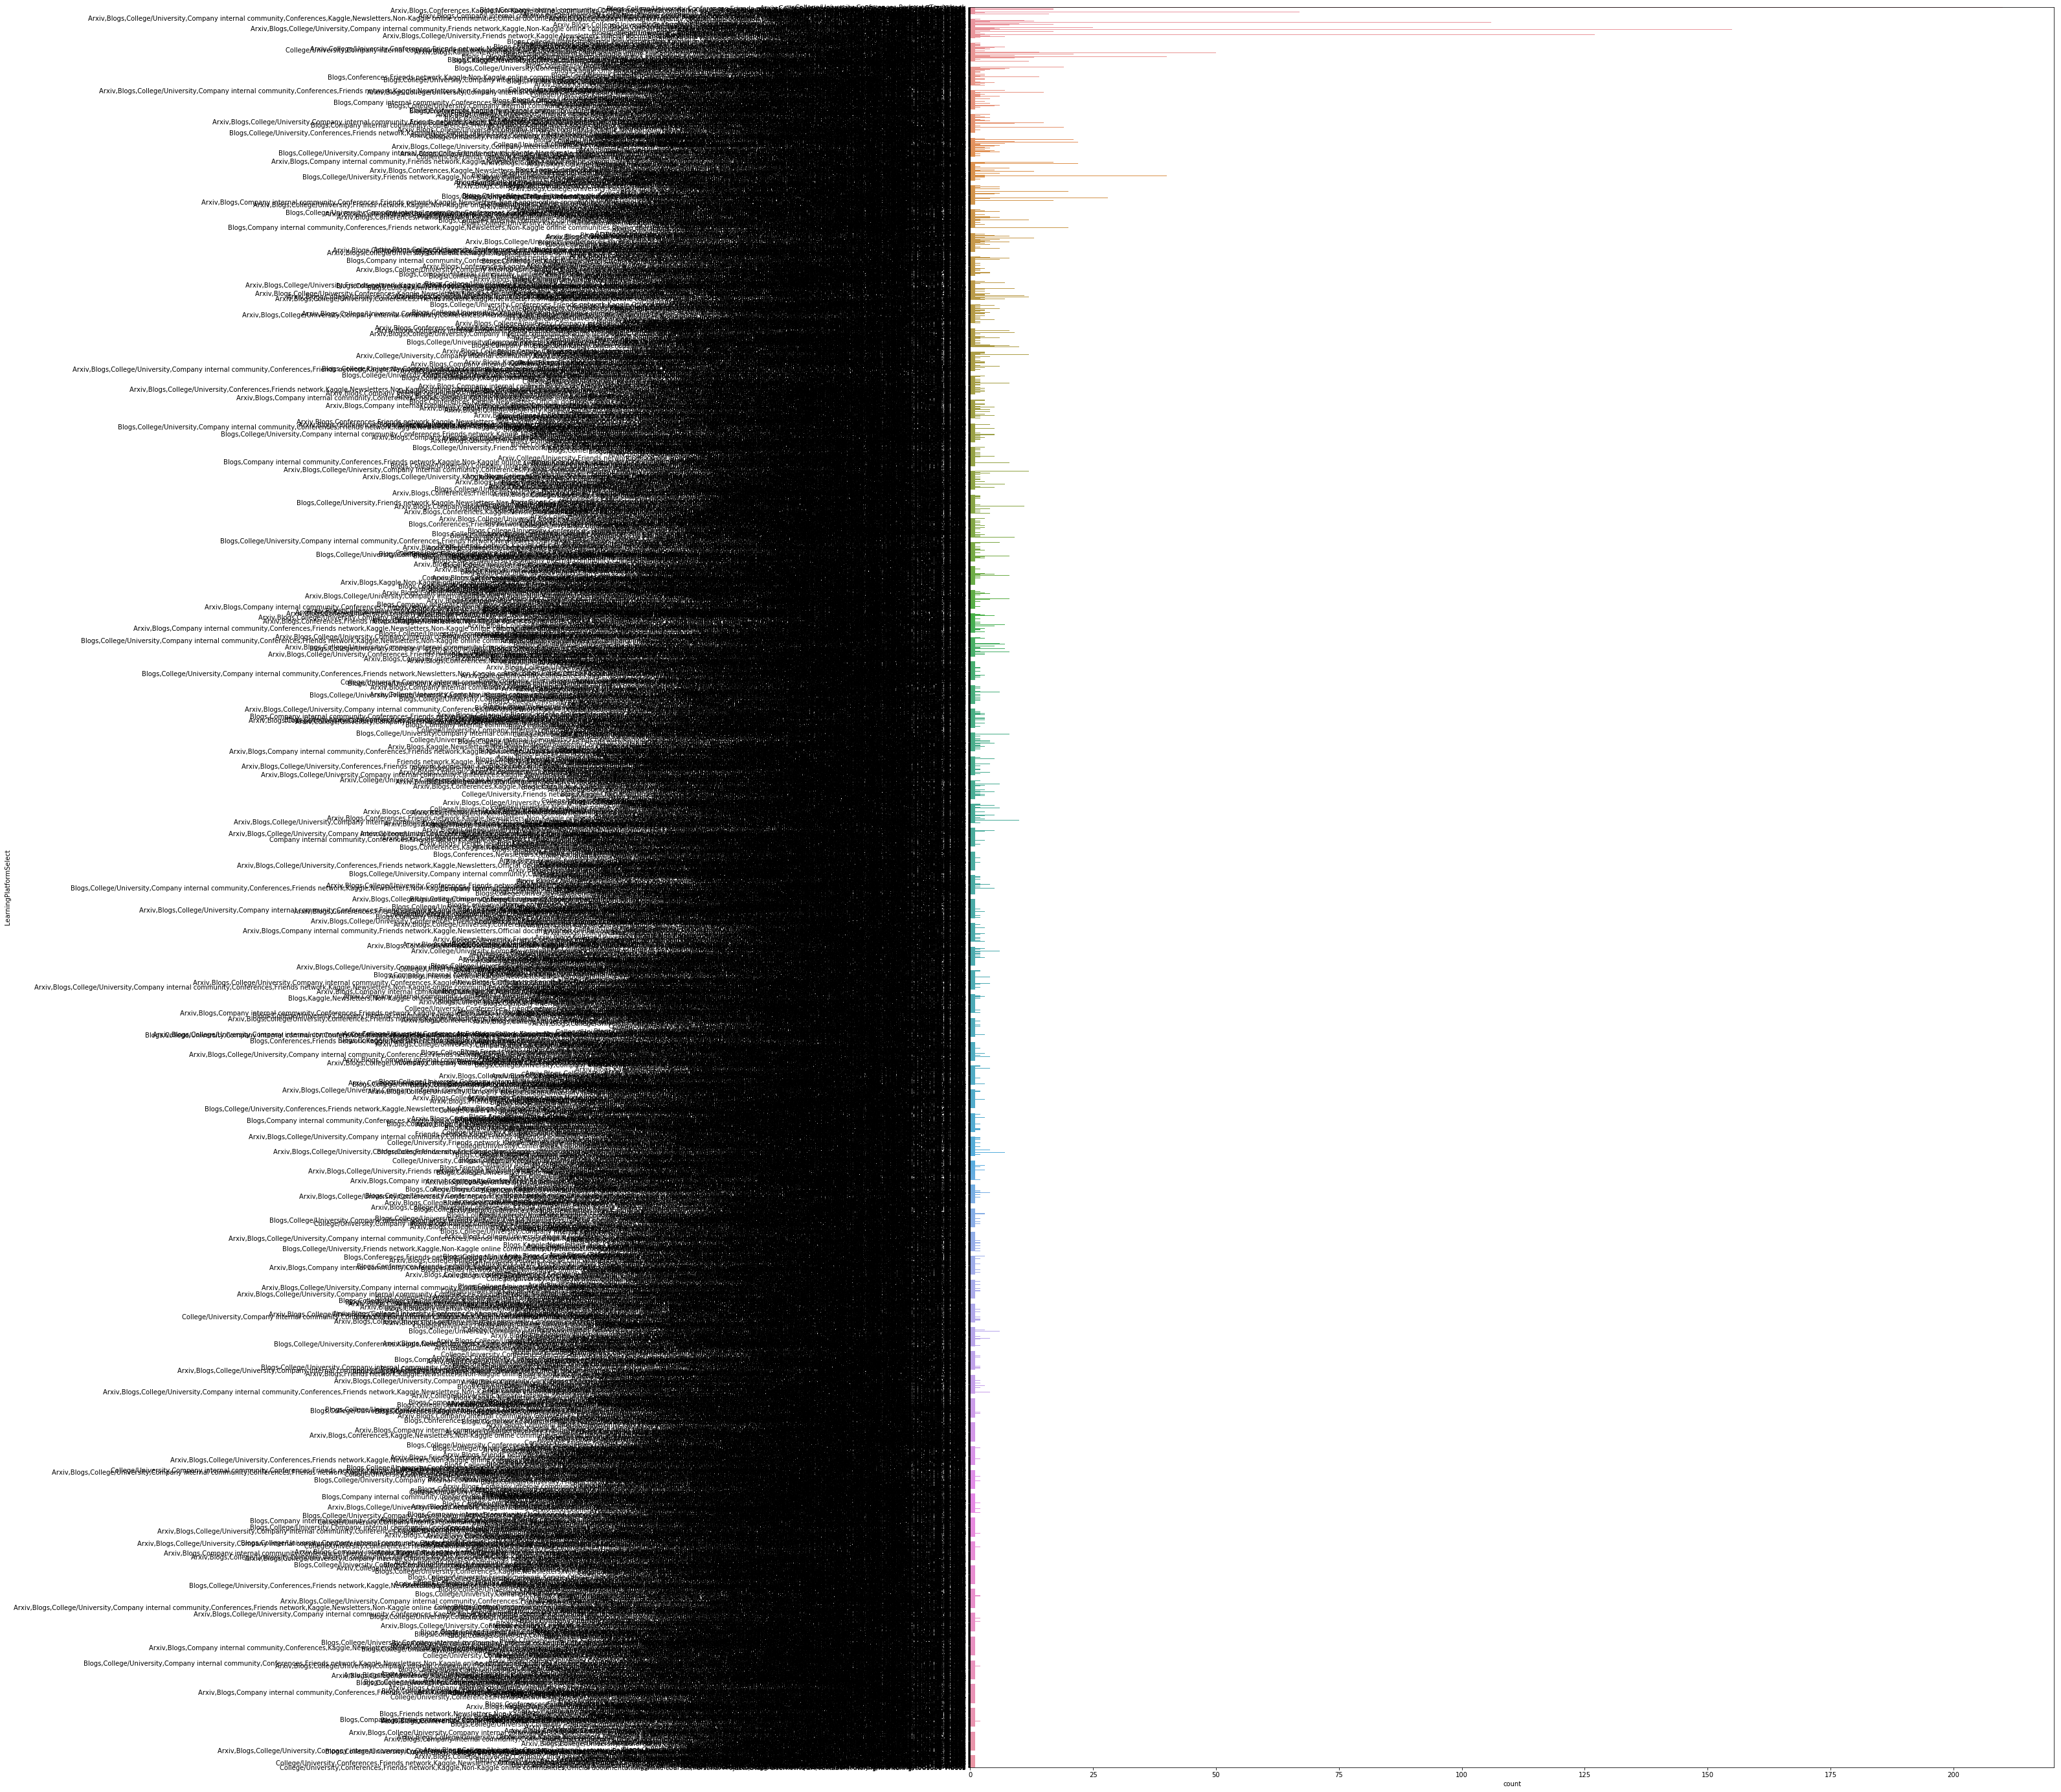

In [5]:
plt.figure(figsize=(30,50))
sns.countplot(y='LearningPlatformSelect',data=mcq)

In [11]:
#new #Explode the Pandas Dataframe to get the number of times each Learning Platform was mentioned
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

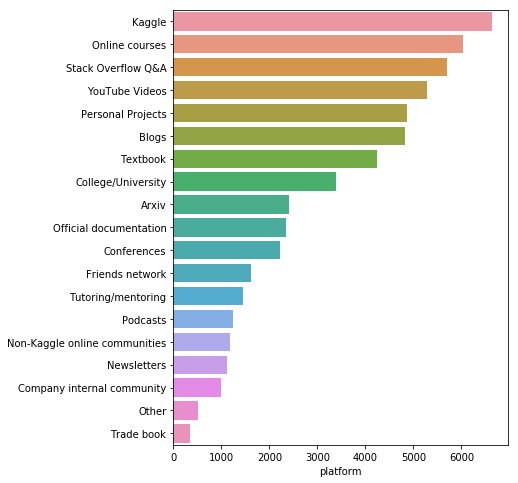

In [12]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts()
sns.barplot(y=data.index, x=data)

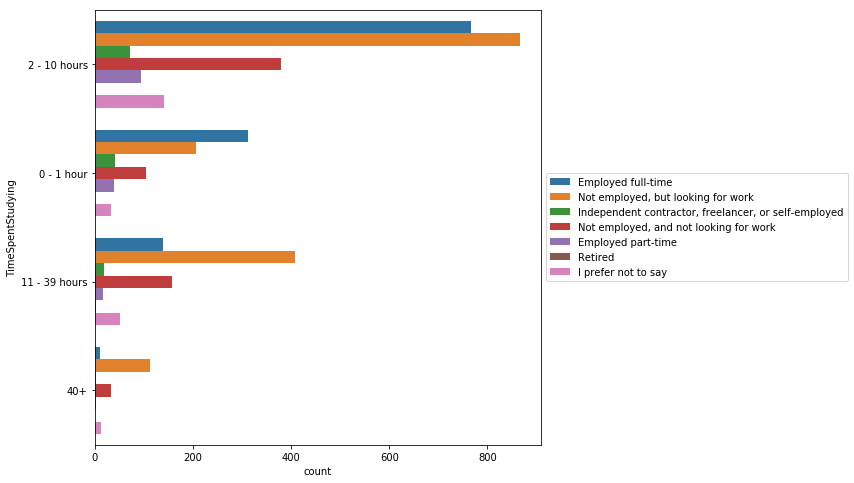

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(y='TimeSpentStudying',data=mcq,
             hue='EmploymentStatus').legend(loc='center left',
                                           bbox_to_anchor=(1,0.5))

In [8]:
#load free form responses into a pandas DataFrame 
ff=pd.read_csv('C:/Users/lakshay/Desktop/data science/data_ss/freeformresponses.csv', encoding='ISO-8859-1', low_memory=False)


In [10]:
ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)

None                     23
Cleaning the data        20
Cleaning                 20
Dirty data               16
Data Cleaning            14
none                     13
Data cleaning            10
dirty data               10
Size                      9
-                         9
Incomplete data           8
cleaning                  8
Missing data              8
Lack of documentation     7
Quality                   6
Name: PersonalProjectsChallengeFreeForm, dtype: int64